In [1]:
# Dependencies
import gempy as gp
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from gempy.assets import topology as tp

import warnings

warnings.filterwarnings("ignore")

# Creating model object and indicating path
data_path = "../../../../input/BES/interpreted_seismics_2/GemPy 2.3.1/testes_3/"
geo_model = gp.create_model("Tests")

No module named 'osgeo'


In [2]:
# Loading model, the extension, the resolution and importing the data
gp.init_data(
    geo_model,
    extent=[425000, 480000, 7780000, 7800000, -7000, -2000],
    resolution=[50, 50, 50],
    path_i=data_path + "surface_points_1000m.csv",
    path_o=data_path + "orientations_points_500m.csv",
)

Active grids: ['regular']


Tests  2024-03-07 17:14

In [3]:
# Ordenando as surfaces (Estratigrafia (topo para base)) 3
gp.map_stack_to_surfaces(
    geo_model,
    {
        "Strat_1": ("top"),
        "Strat_2": ("mid"),
        "Strat_3": ("base"),
        "Basement": ("basement",),
    },
)

,surface,series,order_surfaces,color,id
0,top,Strat_1,1,#015482,1
1,mid,Strat_2,1,#9f0052,2
2,base,Strat_3,1,#ffbe00,3
3,basement,Basement,1,#728f02,4


In [4]:
#geo_model.set_default_orientation()

In [4]:
geo_model.get_data()

X            Y         Z    smooth surface   
surface_points 0     431215.754  7785829.449 -2905.490  0.000002     top  \
               1     432015.754  7785829.449 -2965.060  0.000002     top   
               2     433015.754  7785829.449 -3043.230  0.000002     top   
               3     434015.754  7785829.449 -3120.300  0.000002     top   
               4     435015.754  7785829.449 -3195.170  0.000002     top   
...                         ...          ...       ...       ...     ...   
               1450  473015.754  7795029.449 -6028.570  0.000002    base   
               1451  474015.754  7795029.449 -6071.880  0.000002    base   
orientations   0     452515.754  7790279.449 -3825.725  0.010000     top   
               1     452515.754  7790279.449 -4363.895  0.010000     mid   
               2     452515.754  7790279.449 -4918.950  0.010000    base   

                              G_x           G_y  G_z  
surface_points 0              NaN           NaN  NaN  
               1              NaN           NaN  NaN  
               2              NaN           NaN  NaN  
               3              NaN           NaN  NaN  
               4              NaN           NaN  NaN  
...                           ...           ...  ...  
               1450           NaN           NaN  NaN  
               1451           NaN           NaN  NaN  
orientations   0     1.000000e-12  1.000000e-12  1.0  
               1     1.000000e-12  1.000000e-12  1.0  
               2     1.000000e-12  1.000000e-12  1.0  

[1455 rows x 8 columns]

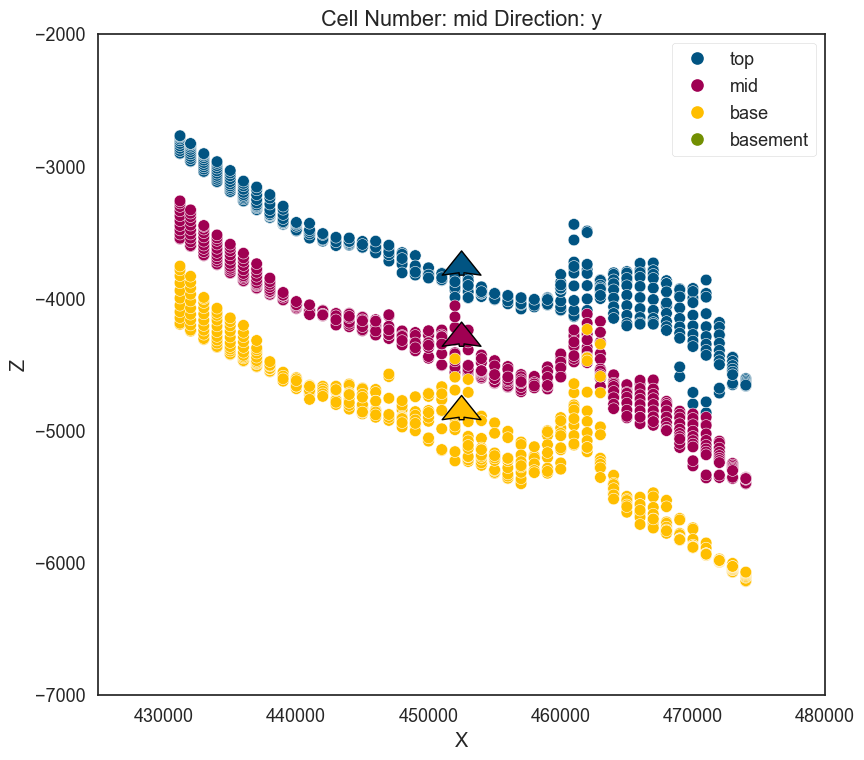

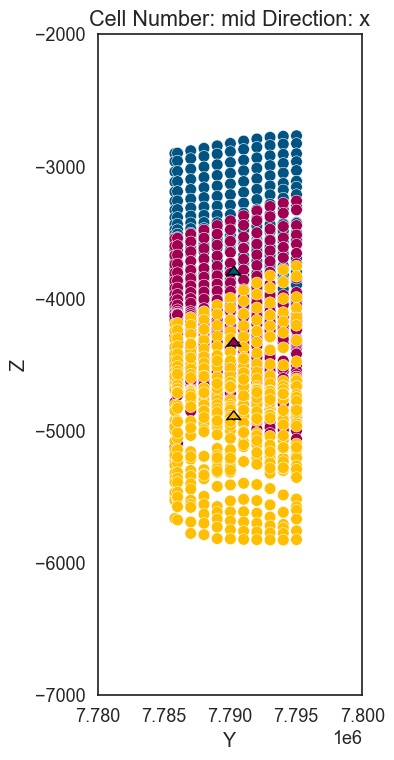

In [4]:
# Seção transversal do modelo
gp.plot_2d(
    geo_model, direction="y", show_data=True, show_lith=True, ve=10, legend=True
)
gp.plot_2d(
    geo_model, direction="x", show_data=True, show_lith=True, ve=10, legend=False
)
# gp.plot_2d(geo_model, direction="z", show_data=True, show_lith=True, ve=1, legend=False)

# Ver os dados em 3D
gpv = gp.plot_3d(
    geo_model,
    plotter_type="background",
    show_data=True,
    ve=2,
)

In [6]:
# Interpolating and computing the model

gp.set_interpolator(
    geo_model,
    #output=["geology"],
    compile_theano=True,
    theano_optimizer="fast_compile",  # fast_compile, fast_run
    dtype="float64",  # for model stability
    verbose=[],
    update_kriging=False,
)

sol = gp.compute_model(geo_model, compute_mesh=True)

Compiling aesara function...
Level of Optimization:  fast_compile
Device:  cpu
Precision:  float64
Number of faults:  0
Compilation Done!
Kriging values: 
                           values
range               58736.700622
$C_o$            82142857.142857
drift equations     [3, 3, 3, 3]


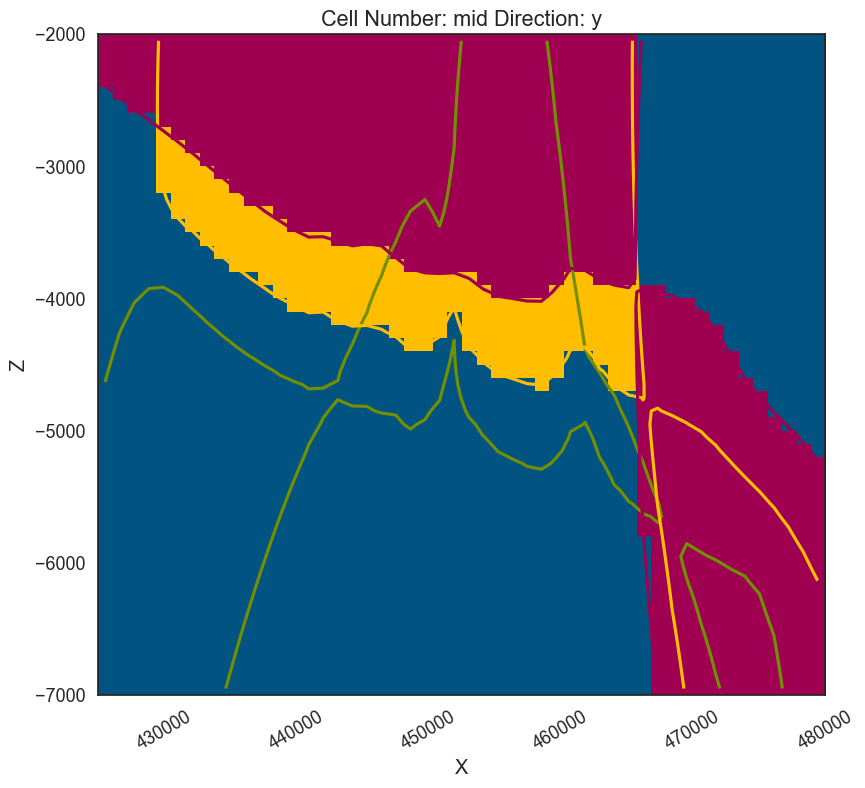

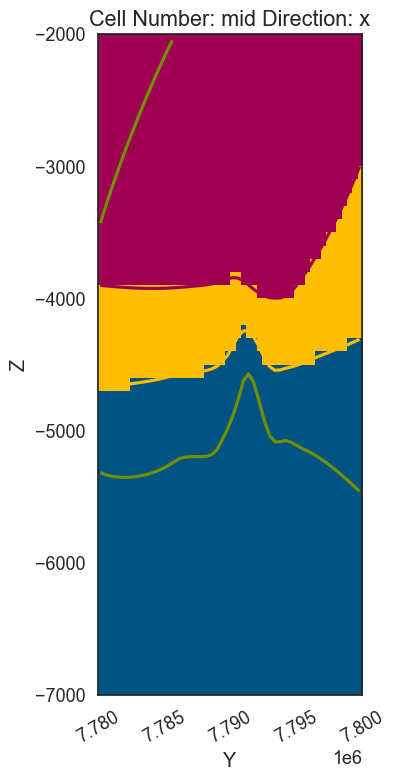

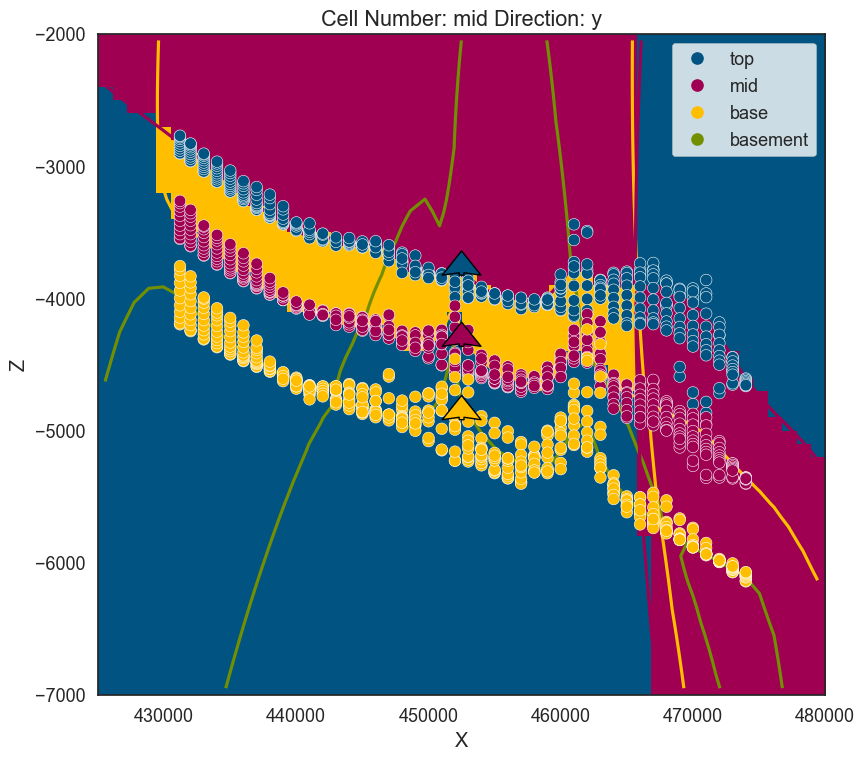

In [7]:
# Ploting 2D and 3D

# Seção transversal do modelo
gp.plot_2d(
    geo_model,
    direction="y",
    show_data=False,
    show_lith=True,
    ve=10,
)
gp.plot_2d(
    geo_model,
    direction="x",
    show_data=False,
    show_lith=True,
    ve=10,
    legend=True,
)

gp.plot_2d(
    geo_model,
    direction="y",
    show_data=True,
    show_lith=True,
    ve=10,
)

In [8]:
gpv = gp.plot_3d(geo_model, image=False, plotter_type="background", show_data=False, ve=5)

In [ ]:
geo_model.solutions

In [ ]:
# Salvar o modelo gerado em zip (contem todos os files relevantes para refazer o modelo)
gp.save_model(
    geo_model,
    compress=False,
    solution=True,
)